In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
galaxy_train_path = "C:/Users/Poll/Documents/ML project/Data/mdm/mdm_images/galaxy_postage/training"
galaxy_test_path = "C:/Users/Poll/Documents/ML project/Data/mdm/mdm_images/galaxy_postage/test"
star_train_path = "C:/Users/Poll/Documents/ML project/Data/mdm/mdm_images/star_postage/training"
star_test_path = "C:/Users/Poll/Documents/ML project/Data/mdm/mdm_images/star_postage/test"

In [3]:

"Adding features blurring, pixelation and noise"

def load_data(data_path):
    data = []
    for filename in os.listdir(data_path):
        if filename.endswith(".png"):
            img = cv2.imread(os.path.join(data_path, filename), cv2.IMREAD_GRAYSCALE)
            data.append(img.flatten()) # flatten 2D matrix into 1D array
    return np.array(data)
# load data
galaxy_train_data = load_data(galaxy_train_path)
galaxy_test_data = load_data(galaxy_test_path)
star_train_data = load_data(star_train_path)
star_test_data = load_data(star_test_path)
#galaxy_train_data = add_features(galaxy_train_data)
#galaxy_test_data = add_features(galaxy_test_data)
#star_train_data = add_features(star_train_data)
#star_test_data = add_features(star_test_data)

X_train = np.column_stack([galaxy_train_data, star_train_data])
y1_train = np.asarray(pd.read_csv("C:/Users/Poll/Documents/ML project/Data/mdm/mdm_training_solution_sorted.csv")["e1"]).astype('float32')
y2_train = np.asarray(pd.read_csv("C:/Users/Poll/Documents/ML project/Data/mdm/mdm_training_solution_sorted.csv")["e2"]).astype('float32')
X_test = np.column_stack([galaxy_test_data, star_test_data])
y1_test=np.asarray(pd.read_csv("C:/Users/Poll/Documents/ML project/Data/mdm/mdm_training_solution.csv")["e1"]).astype('float32')
y2_test=np.asarray(pd.read_csv("C:/Users/Poll/Documents/ML project/Data/mdm/mdm_training_solution.csv")["e2"]).astype('float32')

In [29]:
alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 1.0, 10.0, 100.0, 300.0, 500.0, 1e3, 1.5e3, 2e3, 5e3, 1e4]
coef_norm_stored_1 = []
num_nonzero_coefs_stored_1 = []
rmse_stored_1 = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, normalize=False)
    ridge.fit(X_train, y1_train)
    coef_norm_stored_1.append(np.linalg.norm(ridge.coef_))
    num_nonzero_coefs_stored_1.append(np.count_nonzero(ridge.coef_))
    y1_pred = ridge.predict(X_test)
    rmse_stored_1.append(mean_squared_error(y1_test, y1_pred[0:40000], squared=False))

C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Plea

In [30]:
rmse_stored_1

[0.16853876697128045,
 0.16853876632160086,
 0.16853876550950156,
 0.16853876388530323,
 0.16853876226110548,
 0.1685387508917363,
 0.16853860471649995,
 0.16853714320562527,
 0.16853389697484758,
 0.1685306529093444,
 0.16852255220381435,
 0.1685144649818259,
 0.16850639120821956,
 0.16845822902925395,
 0.16837901159540242]

In [31]:
np.mean(rmse_stored_1)

0.16851690151102405

In [33]:
alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 1.0, 10.0, 100.0, 300.0, 500.0, 1e3, 1.5e3, 2e3, 5e3, 1e4]
rmse_stored_1_normalized = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X_train, y1_train)
    y1_pred_normalized = ridge.predict(X_test)
    rmse_stored_1_normalized.append(mean_squared_error(y1_test, y1_pred_normalized[0:40000], squared=False))

C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn

C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn

In [34]:
rmse_stored_1_normalized

[0.16825293251772364,
 0.16726744671425162,
 0.16626577443303983,
 0.16475584355050785,
 0.1636707870897007,
 0.16047159711930187,
 0.15843752236879632,
 0.1583672487134456,
 0.15836708634093255,
 0.1583672210373406,
 0.15836736866954954,
 0.15836742764525222,
 0.1583674590739533,
 0.15836751901592216,
 0.15836753998299122]

In [35]:
np.mean(rmse_stored_1_normalized)

0.1610707182848473

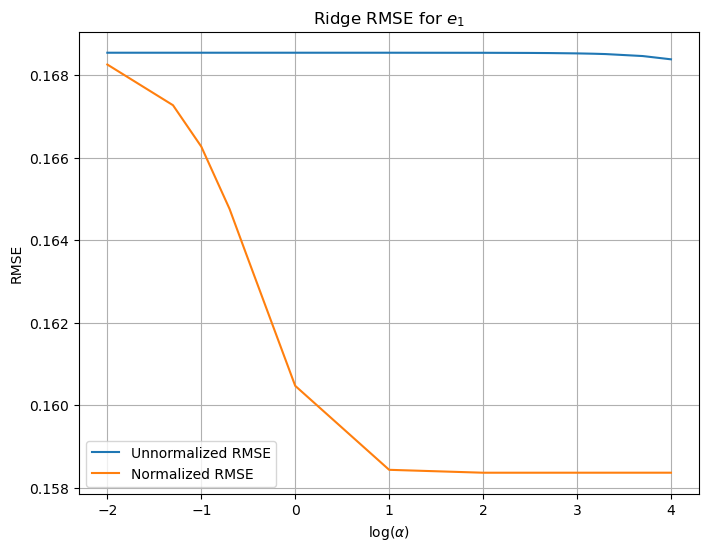

In [69]:
import matplotlib.pyplot as plt
# Importing Image module from PIL package 
from PIL import Image 
import PIL 
  
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.log10(alphas), rmse_stored_1, label="Unnormalized RMSE")
ax.plot(np.log10(alphas), rmse_stored_1_normalized, label="Normalized RMSE")
ax.set_xlabel(r'log($\alpha$)')
ax.set_ylabel("RMSE")
ax.legend()
ax.grid(True)
ax.set_title('Ridge RMSE for $e_{1}$')
plt.savefig('Ridge_e1.png')
plt.show()

In [ ]:
"For e_2"

In [38]:
alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 1.0, 10.0, 100.0, 300.0, 500.0, 1e3, 1.5e3, 2e3, 5e3, 1e4]
coef_norm_stored_2 = []
num_nonzero_coefs_stored_2 = []
rmse_stored_2 = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, normalize=False)
    ridge.fit(X_train, y2_train)
    coef_norm_stored_2.append(np.linalg.norm(ridge.coef_))
    num_nonzero_coefs_stored_2.append(np.count_nonzero(ridge.coef_))
    y2_pred = ridge.predict(X_test)
    rmse_stored_2.append(mean_squared_error(y2_test, y2_pred[0:40000], squared=False))

C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Plea

In [40]:
rmse_stored_2

[0.15116461382239646,
 0.15116461324103947,
 0.15116461251434324,
 0.15116461106095125,
 0.15116460960755976,
 0.15116459943383298,
 0.15116446863092117,
 0.1511631608208924,
 0.15116025600180213,
 0.15115735314710835,
 0.15115010459099304,
 0.1511428682670352,
 0.15113564414299577,
 0.15109255380607167,
 0.15102169147972952]

In [41]:
np.mean(rmse_stored_2)

0.1511450507045115

In [42]:
alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 1.0, 10.0, 100.0, 300.0, 500.0, 1e3, 1.5e3, 2e3, 5e3, 1e4]
rmse_stored_2_normalized = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X_train, y2_train)
    y2_pred_normalized = ridge.predict(X_test)
    rmse_stored_2_normalized.append(mean_squared_error(y2_test, y2_pred_normalized[0:40000], squared=False))

C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn

C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn

In [44]:
rmse_stored_2_normalized

[0.1509120508985544,
 0.15004856854362664,
 0.14917571813053276,
 0.14786108778198603,
 0.14691505773533098,
 0.14411288824996568,
 0.14229824721184148,
 0.14221467556019574,
 0.1422103942853967,
 0.142209573411095,
 0.14220897771698648,
 0.1422087844117919,
 0.14220868894310038,
 0.14220851929697909,
 0.14220846342199744]

In [45]:
np.mean(rmse_stored_2_normalized)

0.1446001130399587

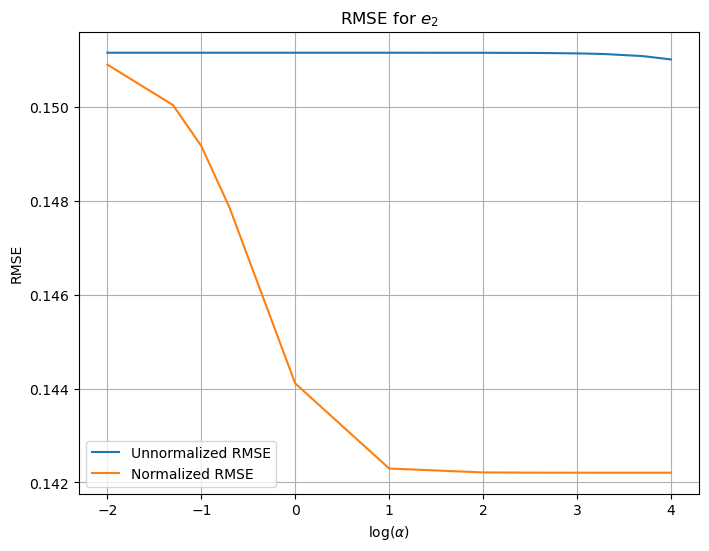

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.log10(alphas), rmse_stored_2, label="Unnormalized RMSE")
ax.plot(np.log10(alphas), rmse_stored_2_normalized, label="Normalized RMSE")
ax.set_xlabel(r'log($\alpha$)')
ax.set_ylabel("RMSE")
ax.legend()
ax.grid(True)
ax.set_title('RMSE for $e_{2}$')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [47]:
"Lasso regression"
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 1.0, 10.0, 100.0, 300.0, 500.0, 1e3, 1.5e3, 2e3, 5e3, 1e4]

rmse_stored_1_lasso = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, normalize=False)
    lasso.fit(X_train, y1_train)
    y1_pred_lasso = lasso.predict(X_test)
    rmse_stored_1_lasso.append(mean_squared_error(y1_test, y1_pred_lasso[0:40000], squared=False))

C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Plea

In [48]:
rmse_stored_1_lasso

[0.15859301915441068,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236]

In [49]:
np.mean(rmse_stored_1_lasso)

0.15838259196741894

In [50]:
"Lasso regression"
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 1.0, 10.0, 100.0, 300.0, 500.0, 1e3, 1.5e3, 2e3, 5e3, 1e4]

rmse_stored_1_lasso_normalized = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, normalize=True)
    lasso.fit(X_train, y1_train)
    y1_pred_lasso_normalized = lasso.predict(X_test)
    rmse_stored_1_lasso_normalized.append(mean_squared_error(y1_test, y1_pred_lasso_normalized[0:40000], squared=False))

C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fro

C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fro

In [51]:
rmse_stored_1_lasso_normalized

[0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236]

In [52]:
np.mean(rmse_stored_1_lasso_normalized)

0.15836756145406236

In [53]:
"Lasso regression"
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 1.0, 10.0, 100.0, 300.0, 500.0, 1e3, 1.5e3, 2e3, 5e3, 1e4]

rmse_stored_2_lasso = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, normalize=False)
    lasso.fit(X_train, y2_train)
    y2_pred_lasso = lasso.predict(X_test)
    rmse_stored_2_lasso.append(mean_squared_error(y2_test, y2_pred_lasso[0:40000], squared=False))

C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Plea

In [54]:
rmse_stored_2_lasso

[0.14237021988552076,
 0.1422085203324688,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915]

In [55]:
np.mean(rmse_stored_2_lasso)

0.14221920286587858

In [56]:
"Lasso regression"
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 1.0, 10.0, 100.0, 300.0, 500.0, 1e3, 1.5e3, 2e3, 5e3, 1e4]

rmse_stored_2_lasso_normalized = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, normalize=True)
    lasso.fit(X_train, y2_train)
    y2_pred_lasso_normalized = lasso.predict(X_test)
    rmse_stored_2_lasso_normalized.append(mean_squared_error(y2_test, y2_pred_lasso_normalized[0:40000], squared=False))

C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fro

C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fro

In [57]:
rmse_stored_2_lasso_normalized

[0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915]

In [58]:
np.mean(rmse_stored_2_lasso_normalized)

0.14220840790539915

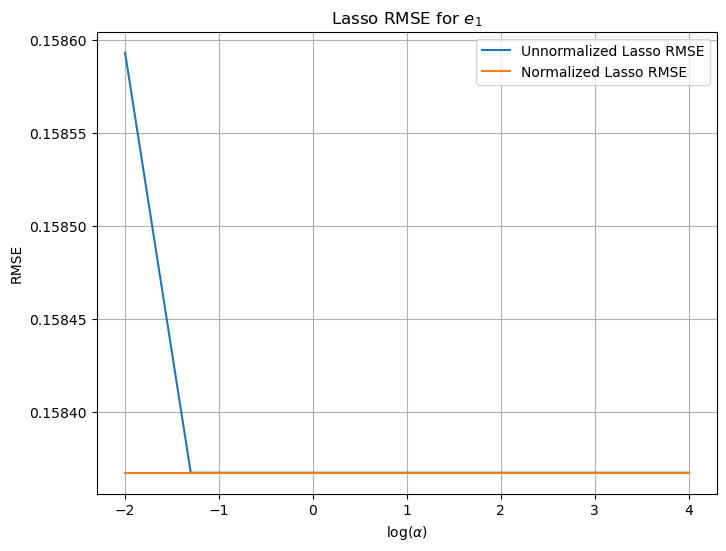

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
#ax.plot(np.log10(alphas), rmse_stored_1, label="Unnormalized Ridge RMSE")
#ax.plot(np.log10(alphas), rmse_stored_1_normalized, label="Normalized Ridge RMSE")
ax.plot(np.log10(alphas), rmse_stored_1_lasso, label="Unnormalized Lasso RMSE")
ax.plot(np.log10(alphas), rmse_stored_1_lasso_normalized, label="Normalized Lasso RMSE")
ax.set_xlabel(r'log($\alpha$)')
ax.set_ylabel("RMSE")
ax.legend()
ax.grid(True)
ax.set_title('Lasso RMSE for $e_{1}$')
plt.savefig('Lasso_e1.png')
plt.show()

In [74]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 1.0, 10.0, 100.0, 300.0, 500.0, 1e3, 1.5e3, 2e3, 5e3, 1e4]

coef_norm_stored_1 = []
num_nonzero_coefs_stored_1 = []
rmse_stored_1_elastic_net = []

for alpha in alphas:
    enet = ElasticNet(alpha=alpha, l1_ratio=0.5, normalize=False)
    enet.fit(X_train, y1_train)
    y1_pred_elastic_net = enet.predict(X_test)
    rmse_stored_1_elastic_net.append(mean_squared_error(y1_test, y1_pred_elastic_net[0:40000], squared=False))


C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Plea

In [75]:
rmse_stored_1_elastic_net

[0.16000448670170625,
 0.15836799320160233,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236]

In [76]:
np.mean(rmse_stored_1_elastic_net)

0.15847671858707463

In [77]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 1.0, 10.0, 100.0, 300.0, 500.0, 1e3, 1.5e3, 2e3, 5e3, 1e4]

rmse_stored_1_elastic_net_normalized = []

for alpha in alphas:
    enet = ElasticNet(alpha=alpha, l1_ratio=0.5, normalize=True)
    enet.fit(X_train, y1_train)
    y1_pred_elastic_net_normalized = enet.predict(X_test)
    rmse_stored_1_elastic_net_normalized.append(mean_squared_error(y1_test, y1_pred_elastic_net_normalized[0:40000], squared=False))


C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1

C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1

In [78]:
rmse_stored_1_elastic_net_normalized

[0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236,
 0.15836756145406236]

In [79]:
np.mean(rmse_stored_1_elastic_net_normalized)

0.15836756145406236

In [83]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 1.0, 10.0, 100.0, 300.0, 500.0, 1e3, 1.5e3, 2e3, 5e3, 1e4]

rmse_stored_2_elastic_net = []

for alpha in alphas:
    enet = ElasticNet(alpha=alpha, l1_ratio=0.5, normalize=False)
    enet.fit(X_train, y2_train)
    y2_pred_elastic_net = enet.predict(X_test)
    rmse_stored_2_elastic_net.append(mean_squared_error(y2_test, y2_pred_elastic_net[0:40000], squared=False))


C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Plea

In [84]:
rmse_stored_2_elastic_net

[0.14335684543521368,
 0.1422157459115225,
 0.14220852032557652,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915]

In [85]:
np.mean(rmse_stored_2_elastic_net)

0.1422854671024735

In [80]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 1.0, 10.0, 100.0, 300.0, 500.0, 1e3, 1.5e3, 2e3, 5e3, 1e4]

rmse_stored_2_elastic_net_normalized = []

for alpha in alphas:
    enet = ElasticNet(alpha=alpha, l1_ratio=0.5, normalize=True)
    enet.fit(X_train, y2_train)
    y2_pred_elastic_net_normalized = enet.predict(X_test)
    rmse_stored_2_elastic_net_normalized.append(mean_squared_error(y2_test, y2_pred_elastic_net_normalized[0:40000], squared=False))


C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1

C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Users\Poll\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1

In [82]:
rmse_stored_2_elastic_net_normalized

[0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915,
 0.14220840790539915]

In [81]:
np.mean(rmse_stored_2_elastic_net_normalized)

0.14220840790539915

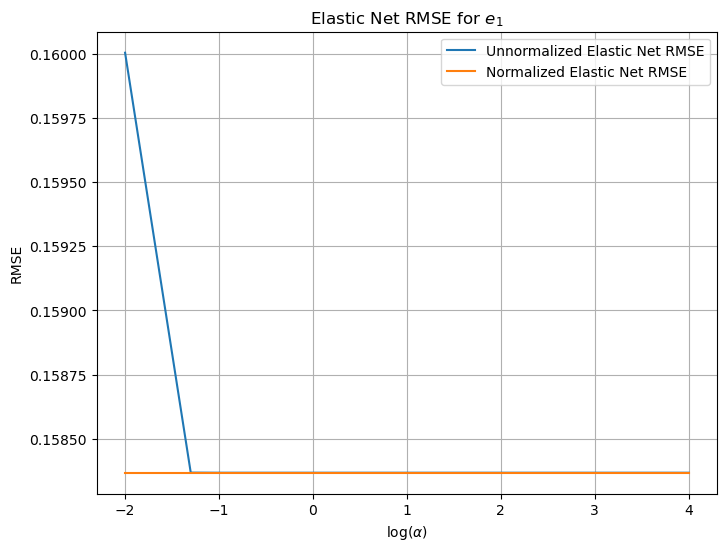

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
#ax.plot(np.log10(alphas), rmse_stored_1, label="Unnormalized Ridge RMSE")
#ax.plot(np.log10(alphas), rmse_stored_1_normalized, label="Normalized Ridge RMSE")
ax.plot(np.log10(alphas), rmse_stored_1_elastic_net, label="Unnormalized Elastic Net RMSE")
ax.plot(np.log10(alphas), rmse_stored_1_elastic_net_normalized, label="Normalized Elastic Net RMSE")
ax.set_xlabel(r'log($\alpha$)')
ax.set_ylabel("RMSE")
ax.legend()
ax.grid(True)
ax.set_title('Elastic Net RMSE for $e_{1}$')
plt.savefig('EN_e1.png')
plt.show()

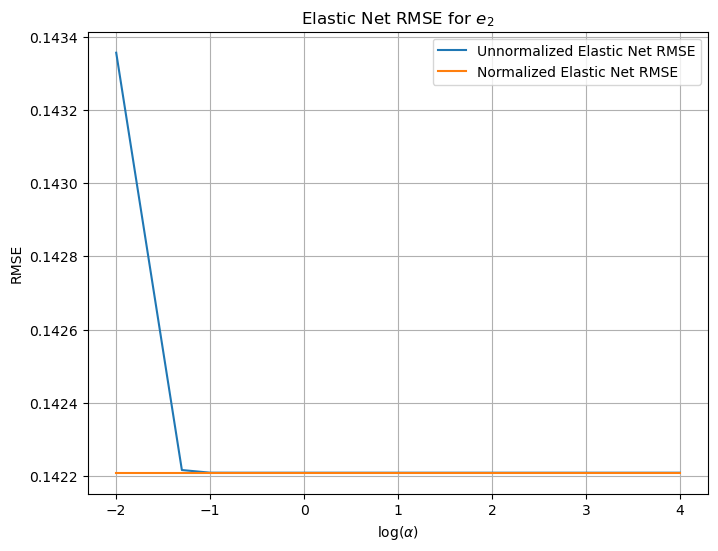

In [90]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
#ax.plot(np.log10(alphas), rmse_stored_1, label="Unnormalized Ridge RMSE")
#ax.plot(np.log10(alphas), rmse_stored_1_normalized, label="Normalized Ridge RMSE")
ax.plot(np.log10(alphas), rmse_stored_2_elastic_net, label="Unnormalized Elastic Net RMSE")
ax.plot(np.log10(alphas), rmse_stored_2_elastic_net_normalized, label="Normalized Elastic Net RMSE")
ax.set_xlabel(r'log($\alpha$)')
ax.set_ylabel("RMSE")
ax.legend()
ax.grid(True)
ax.set_title('Elastic Net RMSE for $e_{2}$')
plt.savefig('EN_e2.png')
plt.show()